Contents

1. Importing Libraries and Data Set
2. The Elbow Technique
3. k-Means Clustering
4. Grouping & Descriptive Stats
5. Exporting

# 1. Importing Libraries and Data Set

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
from sklearn.preprocessing import StandardScaler

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Set path

path = r'/Users/danioprea/Desktop/Data Analytics/Coffee Quality Analysis - Dani Oprea'

In [4]:
# Import data set with pandas

df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'coffee_final.pkl'))

In [5]:
df.head(50)

,Country of Origin,Farm Name,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,Harvest Year,Grading Date,...,Uniformity,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Rating Category
0,Colombia,Finca El Paraiso,Coffee Quality Union,1815.0,"Piendamo,Cauca",Diego Samuel Bermudez,1,35 kg,2021 / 2022,2022-09-21,...,10.0,8.58,89.33,11.8,0,0,green,3,"September 21st, 2023",High Rating
1,Taiwan,Royal Bean Geisha Estate,Taiwan Coffee Laboratory,1200.0,Chiayi,曾福森,1,80 kg,2021 / 2022,2022-11-15,...,10.0,8.50,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",High Rating
2,Laos,OKLAO coffee farms,Taiwan Coffee Laboratory,1300.0,Laos Borofen Plateau,WU TAO CHI,19,25 kg,2021 / 2022,2022-11-15,...,10.0,8.33,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",High Rating
3,Costa Rica,La Cumbre,Coffee Quality Union,1900.0,"Los Santos,Tarrazu",Santa Maria de Dota,1,22 kg,2022,2022-09-21,...,10.0,8.25,87.17,11.8,0,0,green,0,"September 21st, 2023",High Rating
4,Colombia,Finca Santuario,Coffee Quality Union,1975.0,"Popayan,Cauca",Camilo Merizalde,2,24 kg,2022,2023-03-06,...,10.0,8.25,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",High Rating
5,Guatemala,La Colina,Taiwan Coffee Laboratory,1668.0,Chimaltenango,Emilio Antonio Medina Garcia,5,30 kg,2022,2022-11-15,...,10.0,8.25,87.00,10.7,0,0,green,2,"November 15th, 2023",High Rating
6,Taiwan,野牡丹咖啡莊園 Melastoma Coffee Estate,Taiwan Coffee Laboratory,1250.0,Chiayi,黃保錫,1,27 kg,2021 / 2022,2022-11-15,...,10.0,8.25,86.92,9.1,0,0,green,0,"November 15th, 2023",High Rating
7,Taiwan,七彩琉璃咖啡莊園 Chi Tsai Liu Li Ecological Farm,Taiwan Coffee Laboratory,1200.0,Chiayi,莊家榮,1,90 kg,2021 / 2022,2022-11-15,...,10.0,8.08,86.75,10.0,0,0,yellow-green,1,"November 15th, 2023",High Rating
8,Taiwan,亮軒咖啡莊園 Liang Xuan Coffee Farm,Taiwan Coffee Laboratory,1250.0,Chiayi,鍾旭亮,1,30 kg,2021 / 2022,2022-11-15,...,10.0,8.25,86.67,10.8,0,0,greenish,0,"November 15th, 2023",High Rating
9,"Tanzania, United Republic Of",MASHIMA AMCOS,DORMAN (T) LIMITED,1550.0,KILIMANJARO,DORMAN (T) LIMITED,320,60 kg,2022 / 2023,2023-02-01,...,10.0,8.00,86.50,11.0,0,0,greenish,0,"February 1st, 2024",High Rating


In [6]:
df.shape

(197, 28)

In [7]:
df.columns

Index(['Country of Origin', 'Farm Name', 'Company', 'Altitude', 'Region',
       'Producer', 'Number of Bags', 'Bag Weight', 'Harvest Year',
       'Grading Date', 'Variety', 'Processing Method', 'Aroma', 'Flavor',
       'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Overall',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Rating Category'],
      dtype='object')

In [8]:
# Create a new dataframe without categorical columns

df_cont = df[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall', 'Total Cup Points', 'Category One Defects', 'Category Two Defects']]

In [9]:
df_cont.head(50)

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Overall,Total Cup Points,Category One Defects,Category Two Defects
0,8.58,8.50,8.42,8.58,8.25,8.42,8.58,89.33,0,3
1,8.50,8.50,7.92,8.00,7.92,8.25,8.50,87.58,0,0
2,8.33,8.42,8.08,8.17,7.92,8.17,8.33,87.42,0,2
3,8.08,8.17,8.17,8.25,8.17,8.08,8.25,87.17,0,0
4,8.33,8.33,8.08,8.25,7.92,7.92,8.25,87.08,0,2
5,8.33,8.33,8.25,7.83,7.83,8.17,8.25,87.00,0,2
6,8.33,8.17,8.08,8.00,7.83,8.25,8.25,86.92,0,0
7,8.25,8.25,8.17,8.00,7.92,8.08,8.08,86.75,0,1
8,8.08,8.08,8.25,8.08,7.92,8.00,8.25,86.67,0,0
9,8.08,8.17,8.08,8.17,8.00,8.00,8.00,86.50,0,0


#### Scale data

In [10]:
scaler=StandardScaler() #sets 'scaler' as a shortcut

In [11]:
# Create a list of the columns of the new dataframe

columns=df_cont.columns.values.tolist() 
columns #list the columns

['Aroma',
 'Flavor',
 'Aftertaste',
 'Acidity',
 'Body',
 'Balance',
 'Overall',
 'Total Cup Points',
 'Category One Defects',
 'Category Two Defects']

In [12]:
#run the scaler on the dataframe to create a new 'df_scaled'

df_scaled=pd.DataFrame(scaler.fit_transform(df_cont), columns=columns) 
df_scaled.head() #show scaled df

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Overall,Total Cup Points,Category One Defects,Category Two Defects
0,2.956874,2.697220,2.957195,3.452980,2.603618,3.007659,2.924209,3.239209,-0.216274,0.248501
1,2.681686,2.697220,1.152799,1.206439,1.188272,2.347158,2.665170,2.230586,-0.216274,-0.764356
2,2.096911,2.410989,1.730205,1.864908,1.188272,2.036333,2.114713,2.138369,-0.216274,-0.089118
3,1.236949,1.516517,2.054997,2.174776,2.260504,1.686656,1.855675,1.994280,-0.216274,-0.764356
4,2.096911,2.088979,1.730205,2.174776,1.188272,1.065007,1.855675,1.942408,-0.216274,-0.089118


In [13]:
df_scaled.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Overall,Total Cup Points,Category One Defects,Category Two Defects
count,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02
mean,-1.370590e-15,-1.442726e-16,4.328179e-16,3.318271e-15,-5.446292e-15,2.524771e-15,-1.009908e-15,-3.534680e-15,5.410224e-17,5.410224e-17
std,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00
min,-4.198013e+00,-3.564087e+00,-3.358192e+00,-3.325376e+00,-3.486658e+00,-3.791623e+00,-3.260334e+00,-3.290906e+00,-2.162740e-01,-7.643556e-01
25%,-4.829758e-01,-5.944382e-01,-6.515977e-01,-7.302339e-01,-6.130771e-01,-5.668205e-01,-5.728102e-01,-6.511947e-01,-2.162740e-01,-7.643556e-01
50%,-1.733894e-01,1.380303e-02,-7.419091e-02,-7.176504e-02,1.160405e-01,9.368119e-02,-2.235357e-02,2.314202e-02,-2.162740e-01,-4.267366e-01
75%,6.865730e-01,6.220443e-01,5.393038e-01,5.479703e-01,4.591547e-01,4.045055e-01,7.871415e-01,6.456067e-01,-2.162740e-01,2.485012e-01
max,2.956874e+00,2.697220e+00,2.957195e+00,3.452980e+00,2.603618e+00,3.007659e+00,2.924209e+00,3.239209e+00,8.304921e+00,4.637547e+00


In [14]:
df_cont.head()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Overall,Total Cup Points,Category One Defects,Category Two Defects
0,8.58,8.50,8.42,8.58,8.25,8.42,8.58,89.33,0,3
1,8.50,8.50,7.92,8.00,7.92,8.25,8.50,87.58,0,0
2,8.33,8.42,8.08,8.17,7.92,8.17,8.33,87.42,0,2
3,8.08,8.17,8.17,8.25,8.17,8.08,8.25,87.17,0,0
4,8.33,8.33,8.08,8.25,7.92,7.92,8.25,87.08,0,2


# 2. The Elbow Technique

In [15]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [16]:
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))] # Creates a score that represents a rate of variation for the given cluster option.

score

/Users/danioprea/PycharmProjects/Coffee_Quality_Data_Analysis/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/danioprea/PycharmProjects/Coffee_Quality_Data_Analysis/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/danioprea/PycharmProjects/Coffee_Quality_Data_Analysis/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/danioprea/Py

[-1970.0,
 -1134.0180813149245,
 -898.9573346619634,
 -753.4650795516211,
 -619.0001324890968,
 -544.1919944705563,
 -487.4670690258397,
 -457.97335623464863,
 -435.5342067292163]

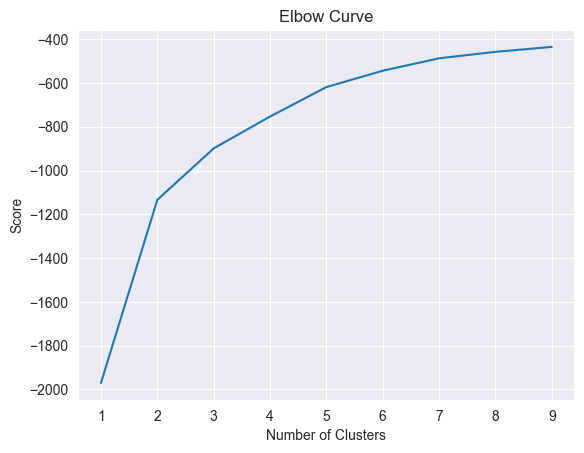

In [17]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Based on this plot, we'll choose to go with 3 clusters as after 3, the graph begins to flatten out. We could potentially do 5 but the gains diminish.

# 3. k-Means Clustering

In [24]:
# Create the k-means object

kmeans = KMeans(n_clusters=3)

In [25]:
# Fit the k-means object to the data

kmeans.fit(df_scaled)

/Users/danioprea/PycharmProjects/Coffee_Quality_Data_Analysis/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [26]:
df_scaled['clusters'] = kmeans.fit_predict(df_scaled)

/Users/danioprea/PycharmProjects/Coffee_Quality_Data_Analysis/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
df_scaled.head(50)

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Overall,Total Cup Points,Category One Defects,Category Two Defects,clusters
0,2.956874,2.697220,2.957195,3.452980,2.603618,3.007659,2.924209,3.239209,-0.216274,0.248501,0
1,2.681686,2.697220,1.152799,1.206439,1.188272,2.347158,2.665170,2.230586,-0.216274,-0.764356,0
2,2.096911,2.410989,1.730205,1.864908,1.188272,2.036333,2.114713,2.138369,-0.216274,-0.089118,0
3,1.236949,1.516517,2.054997,2.174776,2.260504,1.686656,1.855675,1.994280,-0.216274,-0.764356,0
4,2.096911,2.088979,1.730205,2.174776,1.188272,1.065007,1.855675,1.942408,-0.216274,-0.089118,0
5,2.096911,2.088979,2.343700,0.547970,0.802269,2.036333,1.855675,1.896300,-0.216274,-0.089118,0
6,2.096911,1.516517,1.730205,1.206439,0.802269,2.347158,1.855675,1.850191,-0.216274,-0.764356,0
7,1.821723,1.802748,2.054997,1.206439,1.188272,1.686656,1.305218,1.752210,-0.216274,-0.426737,0
8,1.236949,1.194507,2.343700,1.516307,1.188272,1.375832,1.855675,1.706102,-0.216274,-0.764356,0
9,1.236949,1.516517,1.730205,1.864908,1.531386,1.375832,1.046180,1.608121,-0.216274,-0.764356,0


In [28]:
df_scaled['clusters'].value_counts()

clusters
2    96
0    82
1    19
Name: count, dtype: int64

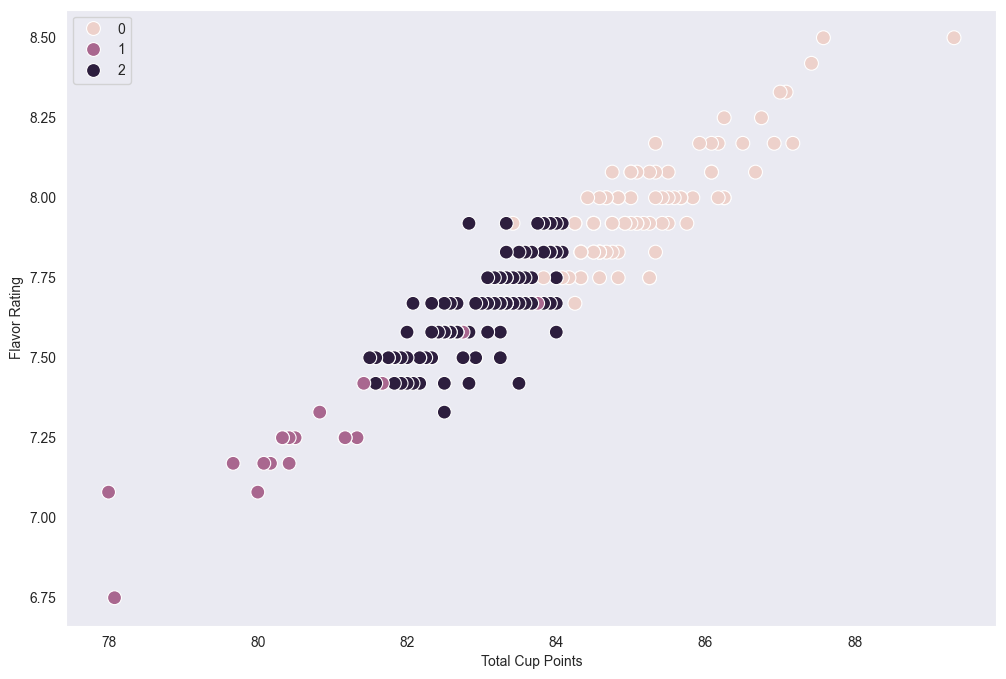

In [29]:
# Plot the clusters for the "Flavor" and "Total Cup Points" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cont['Total Cup Points'], y=df_cont['Flavor'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total Cup Points') # Label x-axis.
plt.ylabel('Flavor Rating') # Label y-axis.
plt.show()

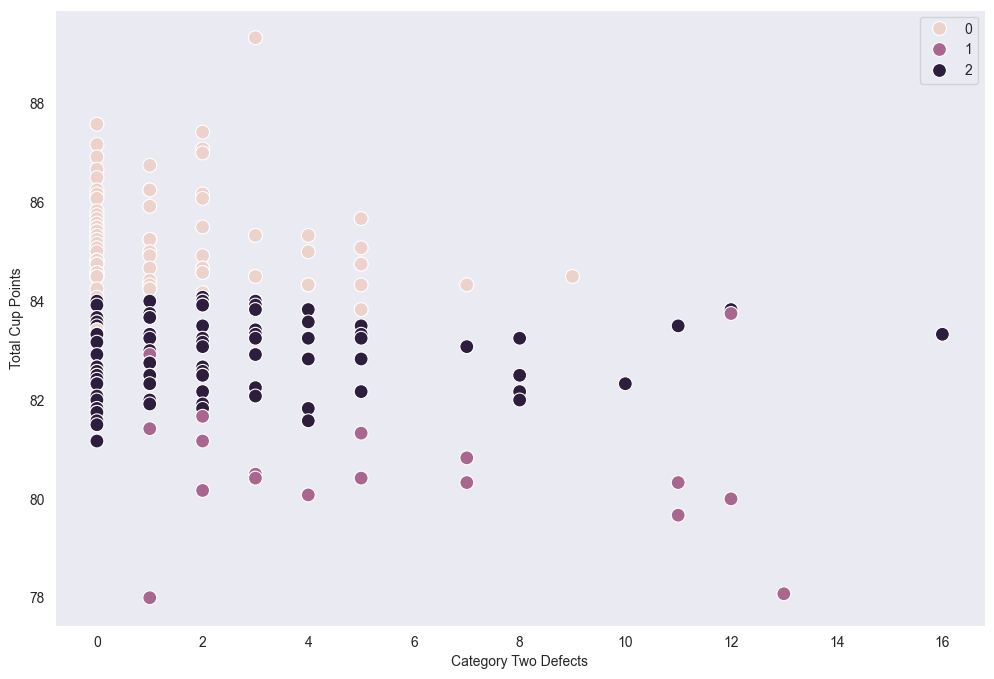

In [30]:
# Plot the clusters for the "Total Cup Points" and "Category Two Defects" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cont['Category Two Defects'], y=df_cont['Total Cup Points'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Category Two Defects') # Label x-axis.
plt.ylabel('Total Cup Points') # Label y-axis.
plt.show()

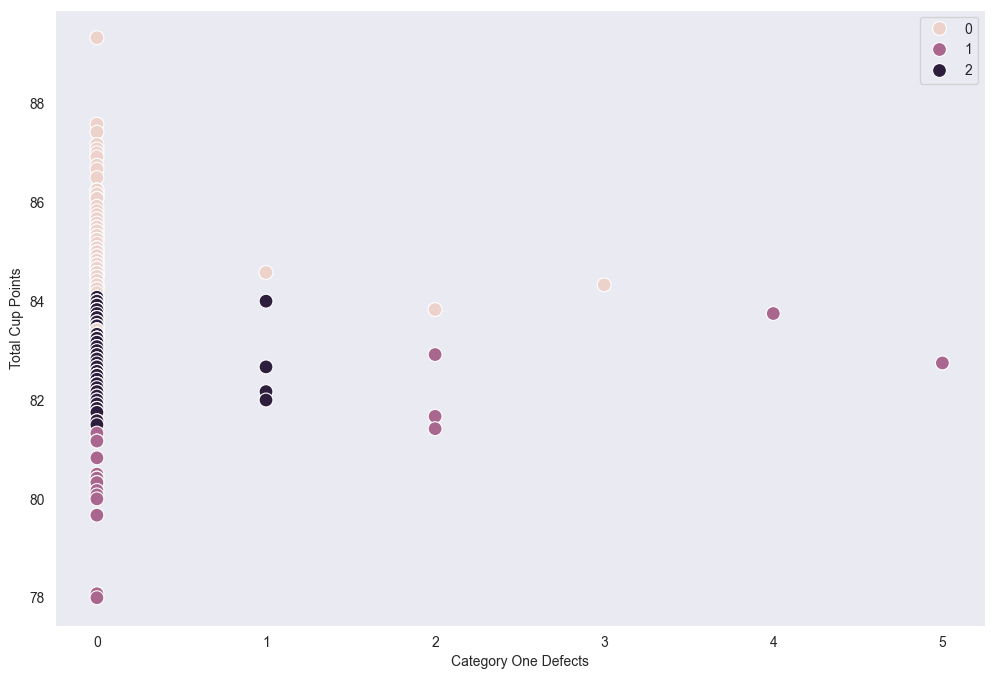

In [31]:
# Plot the clusters for the "Total Cup Points" and "Category One Defects" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cont['Category One Defects'], y=df_cont['Total Cup Points'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Category One Defects') # Label x-axis.
plt.ylabel('Total Cup Points') # Label y-axis.
plt.show()

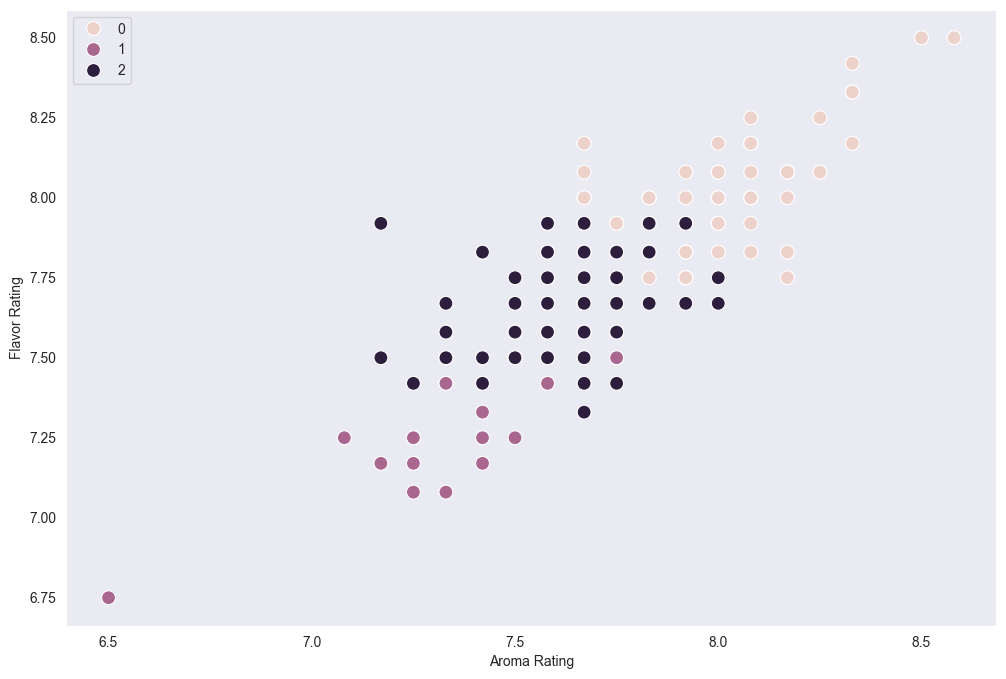

In [32]:
# Plot the clusters for the "Flavor" and "Aroma" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cont['Aroma'], y=df_cont['Flavor'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Aroma Rating') # Label x-axis.
plt.ylabel('Flavor Rating') # Label y-axis.
plt.show()

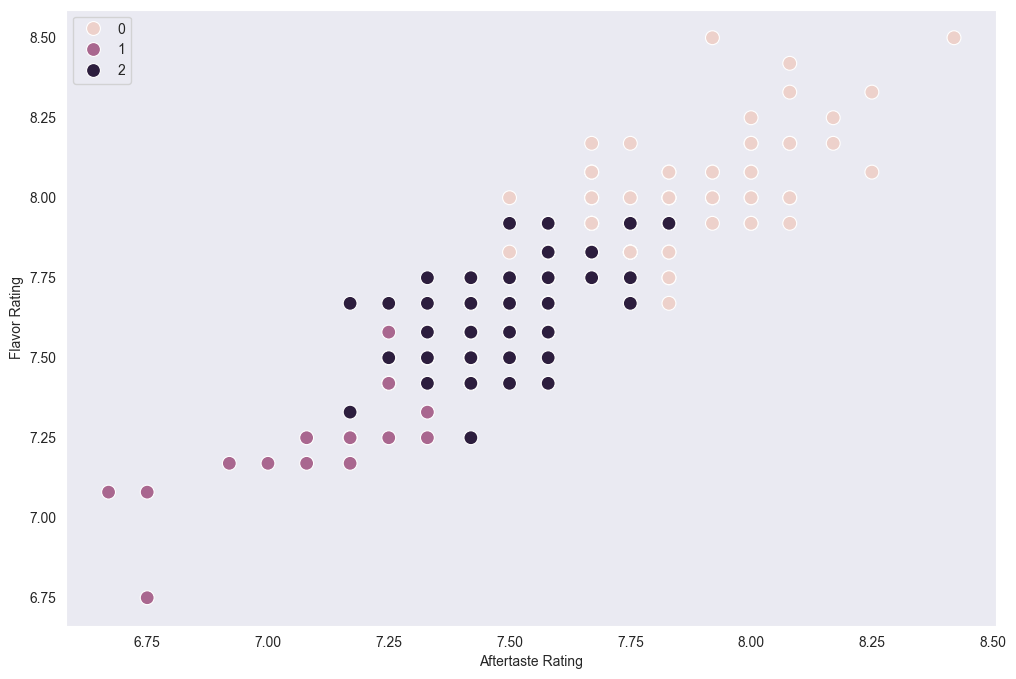

In [33]:
# Plot the clusters for the "Flavor" and "Aftertaste" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cont['Aftertaste'], y=df_cont['Flavor'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Aftertaste Rating') # Label x-axis.
plt.ylabel('Flavor Rating') # Label y-axis.
plt.show()

#### Clustering Thoughts

Truthfully, our clustering hasn't added much to our analysis of flavor rating being an indicator of total cup points. Our regression analysis already proved our hypothesis that flavor rating is a good indicator of total cup points, and we can see this in our clusters. It is a little interesting that there is overlap between the clusters, but each cluster has relatively established boundaries. We'll see what the descriptive stats tell us.

One visualization that did add a little bit to our analysis is "Total Cup Points" vs "Category Two Defects." This was a visualization that we saw no linear connection but we can see in our clustering that the highest rated coffees (cluster 0 - brown) have at most 9 category two defects. The lowest other two clusters are almost tied in category two defects, with the middle-rated group actually having a bit more than the lowest-rated group. This could lead us to the conclusion that the highest rated coffees have the least amount of category two defects. I'm interested to see what the descriptive stats adds to our analysis.

# 4. Grouping & Descriptive Stats

In [34]:
# Add clusters from df_scaled to original dataframe

df['clusters'] = df_scaled['clusters'].to_numpy()
df.head(50)

,Country of Origin,Farm Name,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,Harvest Year,Grading Date,...,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Rating Category,clusters
0,Colombia,Finca El Paraiso,Coffee Quality Union,1815.0,"Piendamo,Cauca",Diego Samuel Bermudez,1,35 kg,2021 / 2022,2022-09-21,...,8.58,89.33,11.8,0,0,green,3,"September 21st, 2023",High Rating,0
1,Taiwan,Royal Bean Geisha Estate,Taiwan Coffee Laboratory,1200.0,Chiayi,曾福森,1,80 kg,2021 / 2022,2022-11-15,...,8.50,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",High Rating,0
2,Laos,OKLAO coffee farms,Taiwan Coffee Laboratory,1300.0,Laos Borofen Plateau,WU TAO CHI,19,25 kg,2021 / 2022,2022-11-15,...,8.33,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",High Rating,0
3,Costa Rica,La Cumbre,Coffee Quality Union,1900.0,"Los Santos,Tarrazu",Santa Maria de Dota,1,22 kg,2022,2022-09-21,...,8.25,87.17,11.8,0,0,green,0,"September 21st, 2023",High Rating,0
4,Colombia,Finca Santuario,Coffee Quality Union,1975.0,"Popayan,Cauca",Camilo Merizalde,2,24 kg,2022,2023-03-06,...,8.25,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",High Rating,0
5,Guatemala,La Colina,Taiwan Coffee Laboratory,1668.0,Chimaltenango,Emilio Antonio Medina Garcia,5,30 kg,2022,2022-11-15,...,8.25,87.00,10.7,0,0,green,2,"November 15th, 2023",High Rating,0
6,Taiwan,野牡丹咖啡莊園 Melastoma Coffee Estate,Taiwan Coffee Laboratory,1250.0,Chiayi,黃保錫,1,27 kg,2021 / 2022,2022-11-15,...,8.25,86.92,9.1,0,0,green,0,"November 15th, 2023",High Rating,0
7,Taiwan,七彩琉璃咖啡莊園 Chi Tsai Liu Li Ecological Farm,Taiwan Coffee Laboratory,1200.0,Chiayi,莊家榮,1,90 kg,2021 / 2022,2022-11-15,...,8.08,86.75,10.0,0,0,yellow-green,1,"November 15th, 2023",High Rating,0
8,Taiwan,亮軒咖啡莊園 Liang Xuan Coffee Farm,Taiwan Coffee Laboratory,1250.0,Chiayi,鍾旭亮,1,30 kg,2021 / 2022,2022-11-15,...,8.25,86.67,10.8,0,0,greenish,0,"November 15th, 2023",High Rating,0
9,"Tanzania, United Republic Of",MASHIMA AMCOS,DORMAN (T) LIMITED,1550.0,KILIMANJARO,DORMAN (T) LIMITED,320,60 kg,2022 / 2023,2023-02-01,...,8.00,86.50,11.0,0,0,greenish,0,"February 1st, 2024",High Rating,0


In [35]:
df['clusters'].value_counts(dropna=False)

clusters
2    96
0    82
1    19
Name: count, dtype: int64

In [36]:
# Create descriptive column for cluster colors

df.loc[df['clusters'] == 2, 'cluster'] = 'pink'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'brown'

/var/folders/q4/1gjxbf_s0jbclz3c0q66rpdh0000gn/T/ipykernel_21563/1272596212.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'pink' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['clusters'] == 2, 'cluster'] = 'pink'


In [37]:
df.head(50)

,Country of Origin,Farm Name,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,Harvest Year,Grading Date,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Rating Category,clusters,cluster
0,Colombia,Finca El Paraiso,Coffee Quality Union,1815.0,"Piendamo,Cauca",Diego Samuel Bermudez,1,35 kg,2021 / 2022,2022-09-21,...,89.33,11.8,0,0,green,3,"September 21st, 2023",High Rating,0,brown
1,Taiwan,Royal Bean Geisha Estate,Taiwan Coffee Laboratory,1200.0,Chiayi,曾福森,1,80 kg,2021 / 2022,2022-11-15,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",High Rating,0,brown
2,Laos,OKLAO coffee farms,Taiwan Coffee Laboratory,1300.0,Laos Borofen Plateau,WU TAO CHI,19,25 kg,2021 / 2022,2022-11-15,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",High Rating,0,brown
3,Costa Rica,La Cumbre,Coffee Quality Union,1900.0,"Los Santos,Tarrazu",Santa Maria de Dota,1,22 kg,2022,2022-09-21,...,87.17,11.8,0,0,green,0,"September 21st, 2023",High Rating,0,brown
4,Colombia,Finca Santuario,Coffee Quality Union,1975.0,"Popayan,Cauca",Camilo Merizalde,2,24 kg,2022,2023-03-06,...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",High Rating,0,brown
5,Guatemala,La Colina,Taiwan Coffee Laboratory,1668.0,Chimaltenango,Emilio Antonio Medina Garcia,5,30 kg,2022,2022-11-15,...,87.00,10.7,0,0,green,2,"November 15th, 2023",High Rating,0,brown
6,Taiwan,野牡丹咖啡莊園 Melastoma Coffee Estate,Taiwan Coffee Laboratory,1250.0,Chiayi,黃保錫,1,27 kg,2021 / 2022,2022-11-15,...,86.92,9.1,0,0,green,0,"November 15th, 2023",High Rating,0,brown
7,Taiwan,七彩琉璃咖啡莊園 Chi Tsai Liu Li Ecological Farm,Taiwan Coffee Laboratory,1200.0,Chiayi,莊家榮,1,90 kg,2021 / 2022,2022-11-15,...,86.75,10.0,0,0,yellow-green,1,"November 15th, 2023",High Rating,0,brown
8,Taiwan,亮軒咖啡莊園 Liang Xuan Coffee Farm,Taiwan Coffee Laboratory,1250.0,Chiayi,鍾旭亮,1,30 kg,2021 / 2022,2022-11-15,...,86.67,10.8,0,0,greenish,0,"November 15th, 2023",High Rating,0,brown
9,"Tanzania, United Republic Of",MASHIMA AMCOS,DORMAN (T) LIMITED,1550.0,KILIMANJARO,DORMAN (T) LIMITED,320,60 kg,2022 / 2023,2023-02-01,...,86.50,11.0,0,0,greenish,0,"February 1st, 2024",High Rating,0,brown


In [38]:
# Use groupby to look at descriptive stats

df.groupby('cluster').agg({'Flavor':['mean', 'median'], 
                         'Total Cup Points':['mean', 'median'], 
                         'Category Two Defects':['mean', 'median']})

Flavor        Total Cup Points        Category Two Defects       
             mean median             mean median                 mean median
cluster                                                                     
brown    7.979756   7.96        85.276951  85.04             1.329268    0.5
pink     7.642083   7.67        82.961354  83.08             2.437500    2.0
purple   7.263684   7.25        80.728421  80.42             5.421053    4.0

#### Descriptive Stats Thoughts

The brown cluster has the best stats out of all the clusters. It has the highest mean flavor rating, highest mean total cup points, and the lowest mean category two defects. This is true for the medians as well. It is clear that the highest quality coffee has little defects. 

The middle-rated coffee cluster (pink) also beats the lowest-rated coffee cluster (purple), unsurprisingly. 

What has been revealed in our cluster analysis is that category two defects can be a decent indicator of total cup points. We see in our descriptive stats that the mean of the category two defects grows as the rating decreases and the same can be said for the median. So we are now seeing a pattern of increasing category two defects as quality rating decreases.

#### Final Thoughts

Overall, the cluster analysis has been good at revealing more insight into the category two defects. We can now see that there is a clear pattern of increasing category two defects as quality decreases.

# 5. Exporting

In [39]:
# Export our dataframe

df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'coffee_final_clusters.pkl'))